In [10]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Definición de la ecuación
def An(T, A, B, C, D, E, F, G):
    return A + (B / (T + C)) + (D*T) + (E * np.log(T)) + (F * (T**G))

especie1 = '2-PE'
especie2 = '1,2-PP'

# Datos de (presión en kPa y temperatura en K) tabla 3 del articulo
datos = {
    'T1': np.array([362.80, 369.85, 376.59, 380.32, 384.40, 388.37, 391.21, 394.47, 396.92, 399.26, 402.22, 405.08, 408.97, 414.71, 422.51, 432.38, 445.60, 459.29, 469.69, 480.96, 488.05, 491.95]),
    'P1': np.array([0.77, 0.97, 1.61, 1.91, 2.21, 2.67, 3.14, 3.67, 4.21, 4.57, 5.17, 5.77, 6.89, 8.77, 11.77, 16.81, 26.67, 41.44, 56.47, 76.64, 92.10, 101.33]),
    'T2': np.array([358.15, 364.55, 371.85, 375.88, 380.04, 384.10, 390.50, 393.66, 395.19,398.14, 401.10, 404.98, 411.02, 419.01,428.99, 442.19, 456.07, 466.88, 469.69, 478.35, 485.75, 489.80]),
    'P2': np.array([0.92, 1.25, 1.73, 2.13, 2.50, 2.97, 3.43, 3.97, 4.63, 4.90, 5.42, 6.10, 7.27, 8.98, 11.87, 16.67, 26.07, 39.64, 54.60, 75.07, 91.06, 101.33]),
}

df = pd.DataFrame(datos)

# Estimación inicial de los coeficientes usando los de la tabla 2 del articulo
coeficientes_iniciales = [  58.17, -8985.10, 0, 0,-5.7034,  4.6087e-18, 6.0]
coeficientes_iniciales2 = [ 133.75, -11577.65, 0, 0, -17.5651,  1.3782e-5, 2.0]
# Ajuste de la curva a los datos para la Especie1
parametros_optimos_1, covarianza_1 = curve_fit(An, df['T1'], np.log(df['P1']), p0=coeficientes_iniciales, maxfev=10000)
A_1, B_1, C_1, D_1, E_1, F_1, G_1 = parametros_optimos_1

# Ajuste de la curva a los datos para la Especie2
parametros_optimos_2, covarianza_2 = curve_fit(An, df['T2'], np.log(df['P2']), p0=coeficientes_iniciales2, maxfev=20000)
A_2, B_2, C_2, D_2, E_2, F_2, G_2 = parametros_optimos_2

# Crear DataFrame con los resultados
resultados = pd.DataFrame({
    'Especie': [especie1, especie2],
    'A': [A_1, A_2],
    'B': [B_1, B_2],
    'C': [C_1, C_2],
    'D': [D_1, D_2],
    'E': [E_1, E_2],
    'F': [F_1, F_2],
    'G': [G_1, G_2]
})

display(resultados)
## representar datos experimentales y presion/T falta graficar la funcion tambien en un linspace para un rango de T  entre 340 y 500 

,Especie,A,B,C,D,E,F,G
0,2-PE,172.178337,-21889.580987,74.140360,-0.001585,-20.668471,-2.106893e-16,3.306347
1,"1,2-PP",798.878069,-11553.927690,-151.213816,-0.011527,-130.675626,2.391000e-04,1.993215


DataFrames por mezcla:


'2-PE (1) + 2-EP (2)'

,T_exp,x,y,g1,g2
0,477.80,0.0000,0.0000,NaN,1.002781
1,477.80,0.0269,0.0115,0.627657,1.018651
2,479.27,0.0650,0.0316,0.684963,1.001021
3,479.77,0.0865,0.0437,0.701946,0.999239
4,480.08,0.1004,0.0531,0.728539,0.996982
5,481.66,0.1688,0.0988,0.771728,0.987535
6,483.18,0.2407,0.1609,0.845280,0.969655
7,484.93,0.3151,0.2292,0.876878,0.946267
8,485.63,0.3573,0.2754,0.911699,0.932027
9,487.09,0.4488,0.3676,0.931358,0.915700


'2-PE (1) + 1,2-PP (2)'

,T_exp,x,y,g1,g2
0,489.80,0.0000,0.0000,NaN,19.557948
1,489.83,0.0511,0.0509,1.052585,19.554005
2,489.87,0.1116,0.1103,1.043302,19.567733
3,489.93,0.1931,0.1905,1.039726,19.585953
4,489.96,0.2635,0.2588,1.034293,19.639541
5,490.02,0.3227,0.3166,1.031525,19.674556
6,490.07,0.3747,0.3681,1.031509,19.691241
7,490.16,0.4619,0.4534,1.028222,19.768964
8,490.25,0.5247,0.5154,1.026477,19.817891
9,490.37,0.5982,0.5874,1.022871,19.927273


'1,2-PP (1) + 2-EP (2)'

,T_exp,x,y,g1,g2
0,477.80,0.0000,0.0000,NaN,1.002781
1,478.24,0.0220,0.0108,11.349123,1.003108
2,478.40,0.0335,0.0172,11.841008,1.004434
3,479.18,0.0638,0.0349,12.467571,0.998574
4,479.93,0.0964,0.0571,13.348675,0.992071
5,480.78,0.1488,0.0929,13.892465,0.991994
6,481.87,0.2045,0.1380,14.775518,0.981873
7,482.75,0.2581,0.1857,15.551423,0.973266
8,484.29,0.3539,0.2808,16.770547,0.950609
9,485.10,0.4152,0.3391,17.062523,0.946319


'2,1-PP (1) + 2-EP (2)'

,T_exp,x,y,g1,g2
0,477.80,0.0000,0.0000,NaN,1.002781
1,478.10,0.0134,0.0045,0.592412,1.004222
2,478.62,0.0294,0.0104,0.614274,1.001571
3,479.51,0.0633,0.0247,0.659639,1.000313
4,480.53,0.1015,0.0438,0.707491,0.996801
5,482.82,0.1838,0.0940,0.783237,0.982604
6,485.41,0.2794,0.1697,0.862004,0.957613
7,487.87,0.3813,0.2610,0.904561,0.935674
8,489.63,0.4545,0.3384,0.935467,0.911124
9,490.95,0.5182,0.4067,0.949706,0.896710


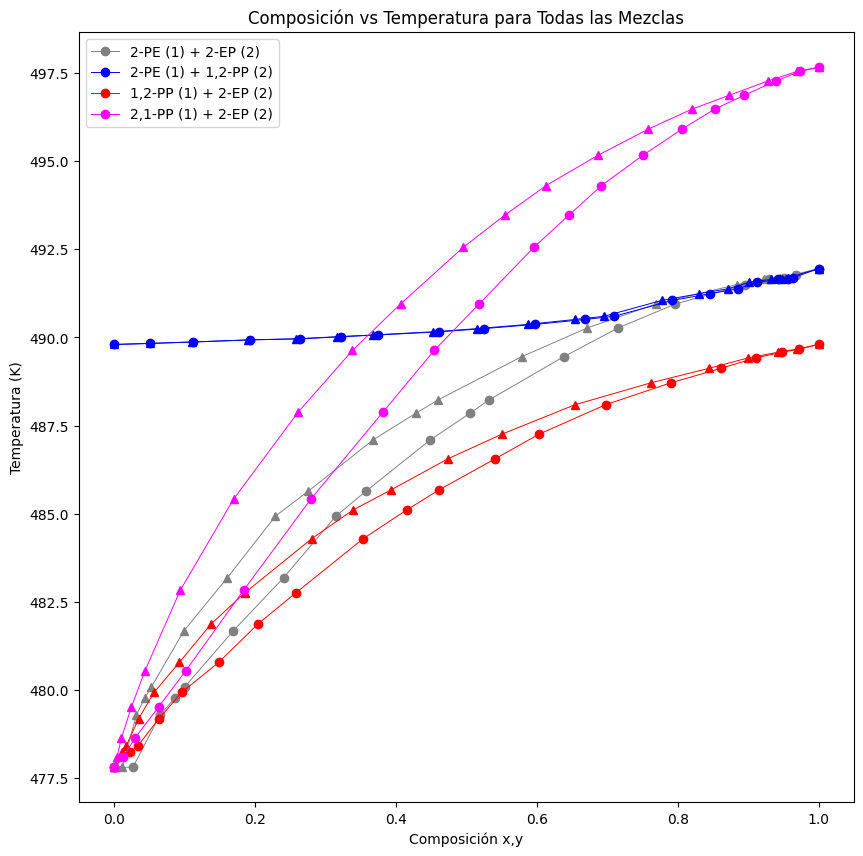

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Definir función para calcular la presión de saturación con la ecuación de Antoine:
def Psat(A, B, C, D, E, F, G, T):
    return np.exp(A + (B / (T + C)) + (D*T) + (E * np.log(T)) + (F * (T**G)))

# Datos experimentales:
P = 101.325  # KPa

# Parámetros de Antoine para cada componente en cada mezcla
An1 = np.array([58.17 , -8985.10 , 0, 0, -5.7034 , 4.6087e-18, 6])
An2 = np.array([154.28, -13145.00, 0, 0, -20.1810, 1.0283e-5 , 2])
An3 = np.array([133.44, -13446.00, 0, 0, -16.6590, 6.6391e-6 , 2])
An4 = np.array([133.75, -11577.65, 0, 0, -17.5651, 1.3782e-6 , 2])
# grafico
plt.figure(figsize=(10, 10))

# Datos para las cuatro mezclas:
mezclas = [
    {'nombre': '2-PE (1) + 2-EP (2)',
     'T_exp': np.array([477.80, 477.80, 479.27, 479.77, 480.08, 481.66,483.18, 484.93, 485.63, 487.09, 487.85, 488.22, 489.45, 490.27, 490.95, 491.50, 491.65,491.70 ,491.78 , 491.95]),
     'x': np.array([0,  0.0269,0.0650, 0.0865,  0.1004, 0.1688, 0.2407, 0.3151,  0.3573,  0.4488, 0.5054, 0.5317, 0.6381,  0.7156, 0.7969, 0.8958,  0.9303,0.9503, 0.9679, 1.0000]),
     'y': np.array([0, 0.0115,0.0316, 0.0437,  0.0531,  0.0988, 0.1609, 0.2292,0.2754, 0.3676, 0.4285, 0.4593, 0.5784, 0.6718, 0.7692, 0.8842, 0.9228, 0.9452 ,  0.9648, 1]),
     'Antoine_params': [An1, An2]},
   
     {'nombre': '2-PE (1) + 1,2-PP (2)',
     'T_exp': np.array([ 489.80, 489.83, 489.87, 489.93, 489.96, 490.02,490.07, 490.16, 490.25, 490.37,490.51, 490.60, 491.05, 491.24, 491.38,  491.56,  491.65, 491.65,491.70 , 491.95 ]),
     'x': np.array([0, 0.0511,  0.1116,0.1931, 0.2635, 0.3227, 0.3747,  0.4619,  0.5247,  0.5982,  0.6680,  0.7098, 0.7926,   0.8455, 0.8850, 0.9124,   0.9427,0.9566,0.9640, 1.0000]),
     'y': np.array([0,  0.0509,  0.1103,0.1905, 0.2588,  0.3166, 0.3681, 0.4534, 0.5154,0.5874, 0.6546, 0.6957,0.7773, 0.8301, 0.8710, 0.9007,  0.9330, 0.9488,  0.9573, 1]),
     'Antoine_params': [An1, An4]},

     {'nombre': '1,2-PP (1) + 2-EP (2)',
     'T_exp': np.array([477.80, 478.24,478.40, 479.18,  479.93, 480.78, 481.87, 482.75,484.29,  485.10, 485.67, 486.56, 487.25, 488.09, 488.71, 489.12, 489.42,489.58 , 489.67 , 489.80]),
      'x': np.array([0,   0.0220,0.0335, 0.0638,  0.0964, 0.1488, 0.2045,0.2581, 0.3539,  0.4152,0.4611, 0.5414, 0.6029,  0.6977,0.7901, 0.8610,  0.9109, 0.9483,  0.9728, 1.0000]),
     'y': np.array([0, 0.0108, 0.0172, 0.0349,  0.0571,   0.0929,0.1380, 0.1857,0.2808, 0.3391,0.3930, 0.4745, 0.5501, 0.6544, 0.7618, 0.8440, 0.9004,  0.9429,  0.9701, 1]),
     'Antoine_params': [An4, An2]},

     {'nombre': '2,1-PP (1) + 2-EP (2)',
     'T_exp': np.array([477.80, 478.10, 478.62, 479.51, 480.53, 482.82,485.41, 487.87, 489.63, 490.95,  492.56, 493.47, 494.31, 495.17,495.91, 496.48,496.87,497.28 ,497.55 ,  497.67]),
     'x': np.array([0,  0.0134, 0.0294,0.0633, 0.1015, 0.1838, 0.2794, 0.3813,  0.4545,0.5182, 0.5961, 0.6456,0.6919,0.7506, 0.8060,0.8525,  0.8941,0.9392, 0.9736, 1.0000]),
     'y': np.array([0, 0.0045, 0.0104, 0.0247,0.0438,  0.0940, 0.1697, 0.2610, 0.3384,  0.4067, 0.4959,0.5547, 0.6132,  0.6868,0.7581,  0.8203,  0.8727,  0.9283 ,  0.9694, 1]),
     'Antoine_params': [An3, An2]},
     
  
]

# Almacenar resultados en un DataFrame
dataframes_mezclas = {}

for mezcla in mezclas:
    nombre = mezcla['nombre']
    T_exp = mezcla['T_exp']
    x = mezcla['x']
    y = mezcla['y']
    Antoine_params = mezcla['Antoine_params']
    resultados = []

    for j in range(len(T_exp)):
        fila = {'T_exp': T_exp[j], 'x': x[j], 'y': y[j]}

        # Calcular Psat para cada componente de la mezcla
        Psat_i = [Psat(*Ant_params, T=T_exp[j]) for Ant_params in Antoine_params]
        # Calcular g1 para cada componente de la mezcla
        for k, (xi, yi, Psat_k) in enumerate(zip(x[j:], y[j:], Psat_i), start=1):
            # Manejar división por cero
            g1 = np.nan if xi == 0 or Psat_k == 0 else (yi * P) /( xi *Psat_k)
            fila[f'g{k}'] = g1

        # Calcular g2 con la ecuación modificada
        if (1 - x[j]) == 0 or any(Psat_k == 0 for Psat_k in Psat_i):
            g2 = np.nan  # Si hay división por cero, asignar NaN
        else:
            g2 = ((1 - y[j]) * P )/ ((1 - x[j]) * Psat_k)
        fila['g2'] = g2

        resultados.append(fila)

    # Crear DataFrame para cada mezcla
    df_mezcla = pd.DataFrame(resultados)
    dataframes_mezclas[nombre] = df_mezcla

# Acceder a los DataFrames individuales por nombre de mezcla
colores = ['gray', 'blue', 'red', 'fuchsia']
print("DataFrames por mezcla:")
for i, (nombre, df_mezcla) in enumerate(dataframes_mezclas.items()):
    display(nombre, df_mezcla)
    plt.plot(df_mezcla['x'], df_mezcla['T_exp'], marker='o',color=colores[i], linewidth=0.7,label=f'{nombre}')
    plt.plot(df_mezcla['y'], df_mezcla['T_exp'], marker='^',color=colores[i],linewidth=0.7)
plt.title('Composición vs Temperatura para Todas las Mezclas')
plt.ylabel('Temperatura (K)')
plt.xlabel('Composición x,y')
plt.legend()
plt.show()

In [15]:
# Definir función para calcular los parámetros de interacción binaria de Wilson
def wilson_params(gamma_ij):
    return -np.log(gamma_ij)

# Definir función para calcular ln(gamma) para cada componente
def wilson_ln_gamma(x, A12, A21):
    gamma1 = np.exp(-np.log(x + A12 * (1 - x)) + x * (A12 / (x + A12 * (1 - x)) - A21 / (1 - x + A21 * x)))
    gamma2 = np.exp(-np.log((1 - x) + A21 * x) + (1 - x) * (A21 / ((1 - x) + A21 * x) - A12 / (x + A12 * (1 - x))))
    return -np.log(gamma1), -np.log(gamma2)

# Datos de ejemplo
x_example = 0.5
A12_example, A21_example = 0.1, 0.2

# Calcular los parámetros de interacción binaria de Wilson
A12, A21 = wilson_params(np.exp(-np.log(x_example + A12_example * (1 - x_example)))), wilson_params(np.exp(-np.log(A21_example + (1 - x_example) * x_example)))

# Mostrar resultados
print(f'A12: {A12}, A21: {A21}')

# También puedes usar la función wilson_ln_gamma con los valores calculados
ln_gamma_example = wilson_ln_gamma(x_example, A12, A21)
print(f'ln(gamma1): {ln_gamma_example[0]}, ln(gamma2): {ln_gamma_example[1]}')


A12: -0.5978370007556204, A21: -0.7985076962177716
ln(gamma1): -4.080459733287838, ln(gamma2): 0.1812634774269682


In [23]:
import numpy as np
from scipy.optimize import minimize

# Crear una lista para almacenar los datos de todos los DataFrames
all_data = []

dataframes_mezclas = {}

# Crear una lista para almacenar los datos de todos los DataFrames
all_data = []

for mezcla in mezclas:
    nombre = mezcla['nombre']
    T_exp = mezcla['T_exp']
    x = mezcla['x']
    y = mezcla['y']
    Antoine_params = mezcla['Antoine_params']
    resultados = []

    for j in range(len(T_exp)):
        fila = {'T_exp': T_exp[j], 'x': x[j], 'y': y[j]}

        # Calcular Psat para cada componente de la mezcla
        Psat_i = [Psat(*Ant_params, T=T_exp[j]) for Ant_params in Antoine_params]
        
        # Obtener los valores de g1 y g2 directamente desde el DataFrame
        fila['g1'] = df_mezcla[j].iloc[j, 3]  # Ajusta el índice según tu DataFrame
        fila['g2'] = df_mezcla[j].iloc[j, 4]  # Ajusta el índice según tu DataFrame

        resultados.append(fila)

        

    # Crear DataFrame para cada mezcla
    df_mezcla = pd.DataFrame(resultados)
    dataframes_mezclas[nombre] = df_mezcla

# Mostrar o trabajar con los datos según sea necesario
for nombre, df_mezcla in dataframes_mezclas.items():
    T_exp = df_mezcla['T_exp'].tolist()
    x = df_mezcla['x'].tolist()
    y = df_mezcla['y'].tolist()

    # Función objetivo a minimizar
    def objective(params):
        A12, A21 = params
        predicted_gamma1 = np.exp(-A12)
        predicted_gamma2 = np.exp(-A21)

        # Error cuadrático medio
        mse = np.mean((predicted_gamma1 - df_mezcla['g1'])**2 + (predicted_gamma2 - df_mezcla['g2'])**2)
        return mse

    # Conjeturas iniciales para A12 y A21
    initial_guess = [0.1, 0.2]

    # Optimización para minimizar la función objetivo
    result = minimize(objective, initial_guess, method='Nelder-Mead')

    # Extraer los resultados de la optimización
    A12_optimized, A21_optimized = result.x

    # Mostrar resultados
    print(f'Parámetros optimizados para {nombre} - A12: {A12_optimized}, A21: {A21_optimized}')
    print(f'g1: {df_mezcla["g1"].tolist()}, g2: {df_mezcla["g2"].tolist()}')




################################ error en la forma de obtener los df en la celda 1 se sobreescriben de forma que solo hay un df por lo que al poner df[j] intenta encontrar df2 df3...
################################ solucionar en la celda de arriba 

KeyError: 0

In [20]:
for j in range(len(T_exp)):
        fila = {'T_exp': T_exp[j], 'x': x[j], 'y': y[j]}

        # Calcular Psat para cada componente de la mezcla
        Psat_i = [Psat(*Ant_params, T=T_exp[j]) for Ant_params in Antoine_params]
        
        # Obtener los valores de g1 y g2 directamente desde el DataFrame
        for k, Psat_k in enumerate(Psat_i, start=1):
            col_name = f'g{k}'
            fila[col_name] = df_mezcla[col_name].iloc[j]  # Ajusta el índice según tu DataFrame

        resultados.append(fila)

# Actualizar el DataFrame con los nuevos resultados
df_mezcla = pd.DataFrame(resultados)
dataframes_mezclas[nombre] = df_mezcla

# Mostrar o trabajar con los datos según sea necesario
for nombre, df_mezcla in dataframes_mezclas.items():
    T_exp = df_mezcla['T_exp'].tolist()
    x = df_mezcla['x'].tolist()
    y = df_mezcla['y'].tolist()

    # Función objetivo a minimizar
    def objective(params):
        A12, A21 = params
        predicted_gamma1 = np.exp(-A12)
        predicted_gamma2 = np.exp(-A21)

        # Error cuadrático medio
        mse = np.mean((predicted_gamma1 - df_mezcla['g1'])**2 + (predicted_gamma2 - df_mezcla['g2'])**2)
        return mse

    # Conjeturas iniciales para A12 y A21
    initial_guess = [0.1, 0.2]

    # Optimización para minimizar la función objetivo
    result = minimize(objective, initial_guess, method='Nelder-Mead')

    # Extraer los resultados de la optimización
    A12_optimized, A21_optimized = result.x

    # Mostrar resultados
    print(f'Parámetros optimizados para {nombre} - A12: {A12_optimized}, A21: {A21_optimized}')
    print(f'g1: {df_mezcla["g1"].tolist()}, g2: {df_mezcla["g2"].tolist()}')

KeyError: 'g1'